Andrew Burke - Final Project EDA and Model

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import linear_model, cross_validation
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(os.path.join('..', 'Datasets', 'BR_data.csv'))
df = df.set_index('user_identities.identity')
df

,articles_viewed,streams_added,sessions,greater_than_5_sessions,push_enabled
user_identities.identity,,,,,
4.32E+17,1,1,1,0,0
2.39E+18,1,5,1,0,0
5.27E+18,2,5,1,0,0
0000000000000a419698266553970235,3,3,1,0,0
000000000000a6409315927365159953,1,8,1,0,0
...,...,...,...,...,...
ffeeaa76195841efab257d819dac7bbb,2,27,12,1,0
fff0a4ec1e7548b2a8b3245defbeabc1,15,51,9,1,0
fff16bbe71f74b06a2e0b58186be2db9,1,5,2,0,0


In [3]:
df.mean()

articles_viewed             6.213623
streams_added              65.120716
sessions                   12.847026
greater_than_5_sessions     0.637812
push_enabled                0.092597
dtype: float64

Mean for streams added seams huge, there has to be outliers

In [4]:
df.var()

articles_viewed              101.157125
streams_added              38743.193372
sessions                     225.481994
greater_than_5_sessions        0.231017
push_enabled                   0.084026
dtype: float64

In [5]:
df.isnull().sum()

articles_viewed            0
streams_added              0
sessions                   0
greater_than_5_sessions    0
push_enabled               0
dtype: int64

In [6]:
df.articles_viewed.value_counts()



1      6449
2      4204
3      2956
4      2174
5      1714
       ... 
134       1
78        1
94        1
274       1
106       1
Name: articles_viewed, dtype: int64

In [7]:
df.streams_added.value_counts()

5       1247
1       1142
4        973
6        855
7        809
        ... 
584        1
632        1
648        1
728        1
2049       1
Name: streams_added, dtype: int64

In [8]:
df.sessions.value_counts()

2      2111
3      2092
4      1963
5      1724
6      1604
       ... 
213       1
139       1
155       1
177       1
159       1
Name: sessions, dtype: int64

In [9]:
df.push_enabled.value_counts()

0    23460
1     2394
Name: push_enabled, dtype: int64

In [10]:
df.greater_than_5_sessions.value_counts()

1    16490
0     9364
Name: greater_than_5_sessions, dtype: int64

In [11]:
df.describe()

,articles_viewed,streams_added,sessions,greater_than_5_sessions,push_enabled
count,25854.000000,25854.000000,25854.000000,25854.000000,25854.000000
mean,6.213623,65.120716,12.847026,0.637812,0.092597
std,10.057690,196.832907,15.016058,0.480642,0.289872
min,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,8.000000,4.000000,0.000000,0.000000
50%,3.000000,21.000000,8.000000,1.000000,0.000000
75%,7.000000,58.000000,16.000000,1.000000,0.000000
max,481.000000,9953.000000,288.000000,1.000000,1.000000


In [12]:
df.corr()

,articles_viewed,streams_added,sessions,greater_than_5_sessions,push_enabled
articles_viewed,1.000000,0.202627,0.582199,0.277830,-0.038056
streams_added,0.202627,1.000000,0.415350,0.188577,-0.024599
sessions,0.582199,0.415350,1.000000,0.492285,-0.018064
greater_than_5_sessions,0.277830,0.188577,0.492285,1.000000,-0.001644
push_enabled,-0.038056,-0.024599,-0.018064,-0.001644,1.000000


In [13]:
df.drop('push_enabled', axis = 1, inplace = True)


In [14]:
df.drop('sessions', axis = 1, inplace = True)

In [15]:
df

,articles_viewed,streams_added,greater_than_5_sessions
user_identities.identity,,,
4.32E+17,1,1,0
2.39E+18,1,5,0
5.27E+18,2,5,0
0000000000000a419698266553970235,3,3,0
000000000000a6409315927365159953,1,8,0
...,...,...,...
ffeeaa76195841efab257d819dac7bbb,2,27,1
fff0a4ec1e7548b2a8b3245defbeabc1,15,51,1
fff16bbe71f74b06a2e0b58186be2db9,1,5,0


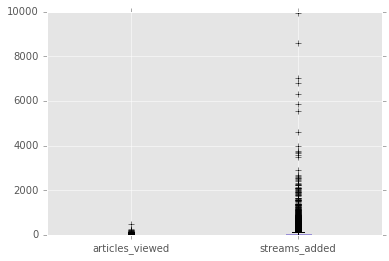

In [16]:
df[['articles_viewed', 'streams_added']].plot(kind = 'box')

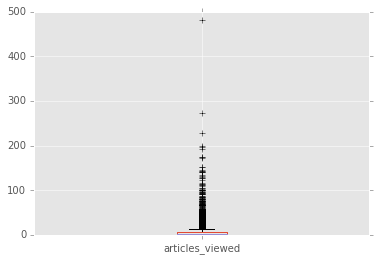

In [17]:
df[['articles_viewed']].plot(kind = 'box')

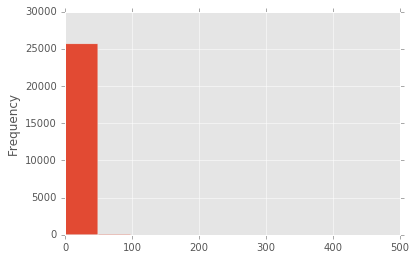

In [18]:
df.articles_viewed.plot(kind = 'hist')

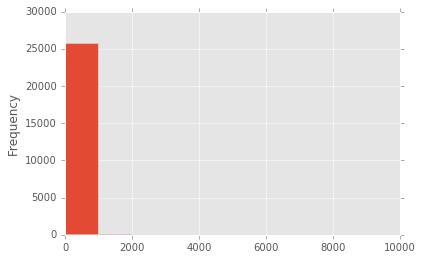

In [19]:
df.streams_added.plot(kind = 'hist')

In [20]:
color = df.greater_than_5_sessions.map({ 1 : 'red', 0 : 'green'})

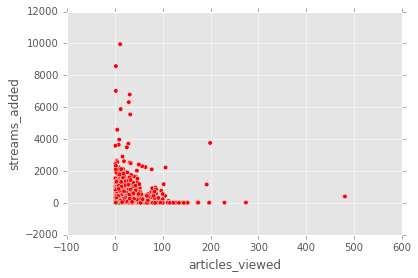

In [21]:
df.plot(x = 'articles_viewed', y = 'streams_added', kind = 'scatter', c = color)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b7071d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1188efc10>]], dtype=object)

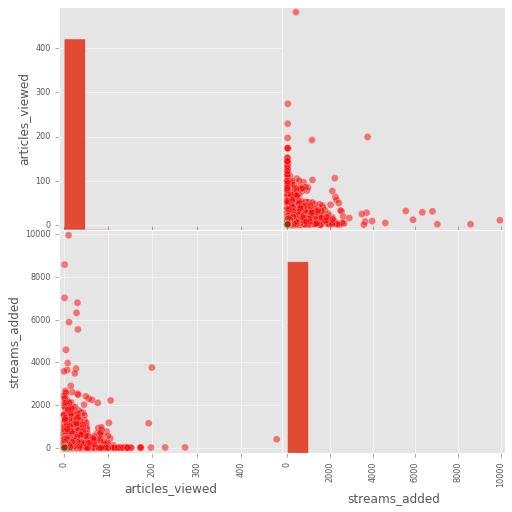

In [22]:
pd.tools.plotting.scatter_matrix(df[ ['articles_viewed', 'streams_added'] ], s = 200, figsize = (8, 8), c = color)

In [23]:
pd.crosstab(df.articles_viewed, df.greater_than_5_sessions)

greater_than_5_sessions,0,1
articles_viewed,,
1,4035,2414
2,2214,1990
3,1185,1771
4,705,1469
5,455,1259
...,...,...
197,0,1
199,0,1
229,0,1


In [24]:
pd.crosstab(df.streams_added, df.greater_than_5_sessions)

greater_than_5_sessions,0,1
streams_added,,
1,913,229
2,543,191
3,488,207
4,623,350
5,776,471
...,...,...
6320,0,1
6796,0,1
7025,0,1


Removing Outliers

In [25]:
Q1_sa = df.streams_added.quantile(0.25)
Q3_sa = df.streams_added.quantile(0.75)

IQR_sa = Q3_sa - Q1_sa

IQR_sa

50.0

In [26]:
df.drop(df[df.streams_added > Q3_sa + 1.5 * IQR_sa].index, inplace = True)
df.shape[0]

23025

In [27]:
Q1_av = df.articles_viewed.quantile(0.25)
Q3_av = df.articles_viewed.quantile(0.75)

IQR_av = Q3_av - Q1_av

IQR_av

5.0

In [28]:
df.drop(df[df.articles_viewed > Q3_av + 1.5 * IQR_av].index, inplace = True)
df.shape[0]

21242

Re-doing EDA without Outliers

In [29]:
df.describe()

,articles_viewed,streams_added,greater_than_5_sessions
count,21242.000000,21242.000000,21242.000000
mean,3.670888,27.279588,0.564919
std,2.972040,29.028298,0.495779
min,1.000000,1.000000,0.000000
25%,1.000000,6.000000,0.000000
50%,3.000000,16.000000,1.000000
75%,5.000000,38.000000,1.000000
max,13.000000,133.000000,1.000000


In [30]:
df.corr()

,articles_viewed,streams_added,greater_than_5_sessions
articles_viewed,1.000000,0.233400,0.365241
streams_added,0.233400,1.000000,0.401868
greater_than_5_sessions,0.365241,0.401868,1.000000


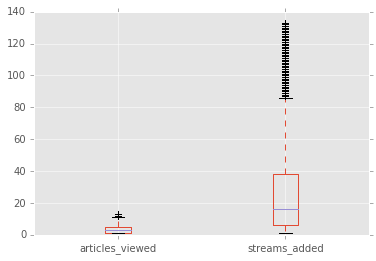

In [31]:
df[['articles_viewed', 'streams_added']].plot(kind = 'box')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c5e6290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11cde7c50>]], dtype=object)

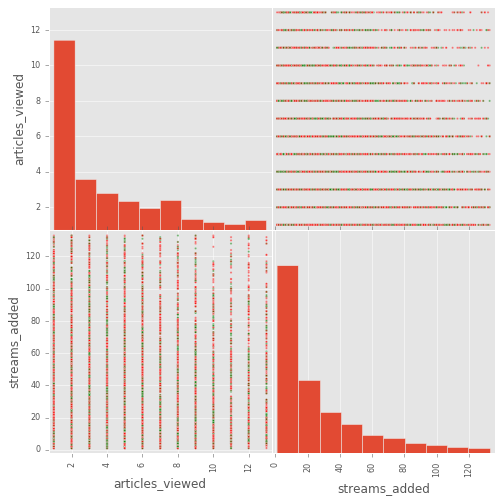

In [32]:
pd.tools.plotting.scatter_matrix(df[ ['articles_viewed', 'streams_added'] ], figsize = (8, 8), c = color)

In [33]:
df.streams_added.value_counts()

5      1166
1      1135
4       916
6       808
7       745
       ... 
125      15
133      15
112      13
123      12
118      11
Name: streams_added, dtype: int64

In [34]:
pd.crosstab(df.articles_viewed, df.greater_than_5_sessions)

greater_than_5_sessions,0,1
articles_viewed,,
1,4001,2209
2,2197,1808
3,1177,1571
4,698,1293
5,451,1103
...,...,...
9,75,507
10,41,409
11,31,326


In [35]:
pd.crosstab(df.streams_added, df.greater_than_5_sessions)

greater_than_5_sessions,0,1
streams_added,,
1,911,224
2,542,186
3,486,190
4,618,298
5,772,394
...,...,...
129,2,20
130,0,17
131,1,19


Checking for Normality

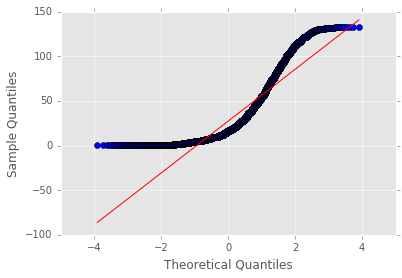

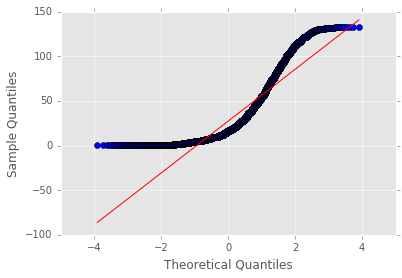

In [36]:
sm.qqplot(df.streams_added, line = 's')

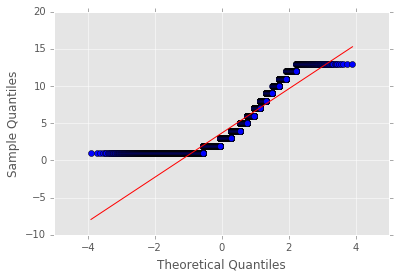

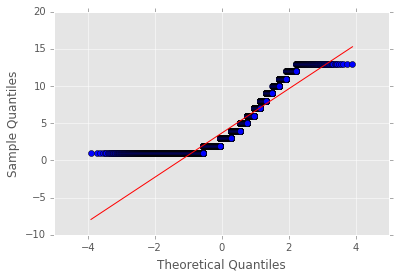

In [37]:
sm.qqplot(df.articles_viewed, line = 's')

Feature Engineering

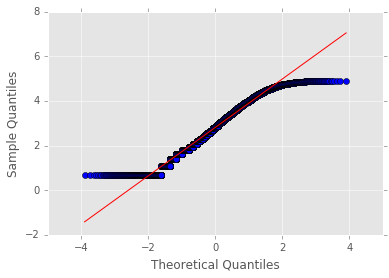

In [38]:
sm.qqplot(df.streams_added.apply(lambda x: np.log(1 + x)), line = 's')


pass

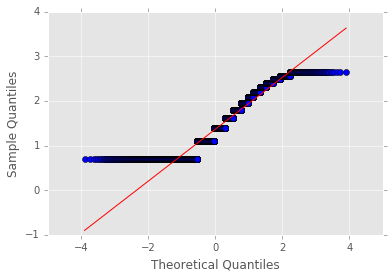

In [39]:
sm.qqplot(df.articles_viewed.apply(lambda x: np.log(1 + x)), line = 's')

pass

In [40]:
articles_per_stream = df.articles_viewed / df.streams_added
articles_per_stream

user_identities.identity
4.32E+17                            1.000000
2.39E+18                            0.200000
5.27E+18                            0.400000
0000000000000a419698266553970235    1.000000
000000000000a6409315927365159953    0.125000
                                      ...   
ffedae157fae4875b0325db40c81ec81    0.108696
ffeeaa76195841efab257d819dac7bbb    0.074074
fff16bbe71f74b06a2e0b58186be2db9    0.200000
fff8033f52ac4d67ae61f2e70559e681    0.666667
fffc6535ff9441ee81e321e95374ed77    0.071429
dtype: float64

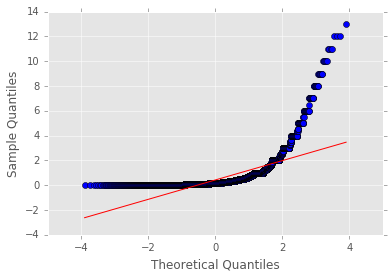

In [41]:
sm.qqplot(articles_per_stream, line = 's')

pass

Saving engineered feature variables for later...

In [42]:
streams_added_eng = df.streams_added.apply(lambda x: np.log(1 + x))

In [43]:
articles_viewed_eng = df.articles_viewed.apply(lambda x: np.log(1 + x))

Setting up training and test set

In [44]:
X = df[df.columns.values]
X.drop('greater_than_5_sessions', axis = 1, inplace = True)

y = df.greater_than_5_sessions

In [45]:
train_X, test_X, train_y, test_y = cross_validation.train_test_split(X, y, train_size = .6, random_state = 0)

Running Decision Tree with Feature Importance

In [46]:
from sklearn import tree, ensemble, metrics, cross_validation, externals

In [47]:
model = tree.DecisionTreeRegressor(random_state = 0).\
    fit(train_X, train_y)

In [48]:
train_y_hat = model.predict(train_X)
print np.sqrt(metrics.mean_squared_error(train_y, train_y_hat))

0.401564754718


In [49]:
sorted(zip(model.feature_importances_, X.columns.values), reverse = True)

[(0.6821347511632101, 'streams_added'),
 (0.31786524883679002, 'articles_viewed')]

In [50]:
cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.23622385776101601

Both features explain a fair amount of the variance, so going to keep both and run Logistic Regression.

In [51]:
model = linear_model.LogisticRegression().\
    fit(train_X, train_y)

In [52]:
print np.exp(model.intercept_)
print np.exp(model.coef_)

[ 0.18468435]
[[ 1.3486749   1.04257393]]


In [53]:
model.score(train_X, train_y)

0.7370733621027854

In [54]:
y_hat = model.predict(train_X)

pd.crosstab(y_hat,
    train_y,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,0,1
Hypothesized Class,,
0,4203,1960
1,1391,5191


Re-running with 1 feature

In [55]:
X = df[df.columns.values]
X.drop(['greater_than_5_sessions', 'articles_viewed'], axis = 1, inplace = True)

y = df.greater_than_5_sessions

In [56]:
train_X, test_X, train_y, test_y = cross_validation.train_test_split(X, y, train_size = .6, random_state = 0)

In [57]:
train_X

,streams_added
user_identities.identity,
646930ea0a3b47bbb3dd2754a8f7f148,23
b85bae42a4864880850c7b6967f3adbc,5
009bd0dc35c54bf2b839bbc751fa1635,3
f14b484ebbe14055a057f9bcac9fdebe,43
e9d692203c24482b981555713e9efa5e,5
...,...
9d48e6380f404edebc555965c55f18bf,5
ed22425dd5a14f2db169ff3960f38c17,7
76ba4a45543e4268a50c11a2890c30a9,78


In [58]:
model = linear_model.LogisticRegression().\
    fit(train_X, train_y)

In [59]:
print np.exp(model.intercept_)
print np.exp(model.coef_)

[ 0.46020328]
[[ 1.04642719]]


In [60]:
model.score(train_X, train_y)

0.69776382895253042

In [61]:
y_hat = model.predict(train_X)

pd.crosstab(y_hat,
    train_y,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,0,1
Hypothesized Class,,
0,4255,2513
1,1339,4638


Re-running model with engineered features

In [62]:
df['streams_added'] = df.streams_added.apply(lambda x: np.log(1 + x))
df['articles_viewed'] = df.articles_viewed.apply(lambda x: np.log(1 + x))

In [63]:
df

,articles_viewed,streams_added,greater_than_5_sessions
user_identities.identity,,,
4.32E+17,0.693147,0.693147,0
2.39E+18,0.693147,1.791759,0
5.27E+18,1.098612,1.791759,0
0000000000000a419698266553970235,1.386294,1.386294,0
000000000000a6409315927365159953,0.693147,2.197225,0
...,...,...,...
ffedae157fae4875b0325db40c81ec81,1.791759,3.850148,1
ffeeaa76195841efab257d819dac7bbb,1.098612,3.332205,1
fff16bbe71f74b06a2e0b58186be2db9,0.693147,1.791759,0


In [64]:
X = df[df.columns.values]
X.drop('greater_than_5_sessions', axis = 1, inplace = True)

y = df.greater_than_5_sessions

In [65]:
train_X, test_X, train_y, test_y = cross_validation.train_test_split(X, y, train_size = .6, random_state = 0)

In [66]:
train_X

,articles_viewed,streams_added
user_identities.identity,,
646930ea0a3b47bbb3dd2754a8f7f148,1.945910,3.178054
b85bae42a4864880850c7b6967f3adbc,1.609438,1.791759
009bd0dc35c54bf2b839bbc751fa1635,1.098612,1.386294
f14b484ebbe14055a057f9bcac9fdebe,1.945910,3.784190
e9d692203c24482b981555713e9efa5e,2.079442,1.791759
...,...,...
9d48e6380f404edebc555965c55f18bf,2.302585,1.791759
ed22425dd5a14f2db169ff3960f38c17,1.609438,2.079442
76ba4a45543e4268a50c11a2890c30a9,2.197225,4.369448


In [67]:
model = linear_model.LogisticRegression().\
    fit(train_X, train_y)

In [68]:
print np.exp(model.intercept_)
print np.exp(model.coef_)

[ 0.01530738]
[[ 3.95730089  2.5831387 ]]


In [69]:
model.score(train_X, train_y)

0.74225186347587291

In [70]:
y_hat = model.predict(train_X)

pd.crosstab(y_hat,
    train_y,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,0,1
Hypothesized Class,,
0,3783,1474
1,1811,5677


In [71]:
model.score(test_X, test_y)

0.73331764152053669

In [72]:
print 'training misclassification =', 1 - model.score(train_X, train_y)
print 'testing  misclassification =', 1 - model.score(test_X, test_y)

training misclassification = 0.257748136524
testing  misclassification = 0.266682358479


In [75]:
predict_1 = [ [0,1] ]

print model.predict(predict_1)
print model.predict_proba(predict_1)

[0]
[[ 0.96196294  0.03803706]]


In [76]:
predict_2 = [ [0,2] ]

print model.predict(predict_2)
print model.predict_proba(predict_2)

[0]
[[ 0.90732565  0.09267435]]


In [77]:
predict_3 = [ [0,3] ]

print model.predict(predict_3)
print model.predict_proba(predict_3)

[0]
[[ 0.79123809  0.20876191]]


In [78]:
predict_4 = [ [0,4] ]

print model.predict(predict_4)
print model.predict_proba(predict_4)

[0]
[[ 0.5946927  0.4053073]]


In [79]:
predict_5 = [ [0,6] ]

print model.predict(predict_5)
print model.predict_proba(predict_5)

[1]
[[ 0.18025643  0.81974357]]


In [99]:
model.predict(X)


array([0, 0, 0, ..., 0, 0, 1])

In [94]:
model.predict_proba(X)

array([[ 0.92878361,  0.07121639],
       [ 0.82135634,  0.17864366],
       [ 0.72468506,  0.27531494],
       ..., 
       [ 0.82135634,  0.17864366],
       [ 0.794556  ,  0.205444  ],
       [ 0.37113034,  0.62886966]])

In [111]:
predict_df = pd.DataFrame(model.predict(X))
predict_df.rename(columns = {0: 'Prediction'}, inplace = True)

predict_df



,Prediction
0,0
1,0
2,0
3,0
4,0
...,...
21237,1
21238,1
21239,0
21240,0


In [118]:
predict_proba_df = pd.DataFrame(model.predict_proba(X))
predict_proba_df.drop(0, axis = 1, inplace = True)
predict_proba_df.rename(columns = {1: 'Probability_Retained'}, inplace = True)
predict_proba_df

,Probability_Retained
0,0.071216
1,0.178644
2,0.275315
3,0.277502
4,0.242178
...,...
21237,0.874250
21238,0.621064
21239,0.178644
21240,0.205444


In [117]:
new_df = X.join([predict_df, predict_proba_df] )
new_df

,articles_viewed,streams_added,Prediction,Probability_Retained
user_identities.identity,,,,
4.32E+17,0.693147,0.693147,NaN,NaN
2.39E+18,0.693147,1.791759,NaN,NaN
5.27E+18,1.098612,1.791759,NaN,NaN
0000000000000a419698266553970235,1.386294,1.386294,NaN,NaN
000000000000a6409315927365159953,0.693147,2.197225,NaN,NaN
...,...,...,...,...
ffedae157fae4875b0325db40c81ec81,1.791759,3.850148,NaN,NaN
ffeeaa76195841efab257d819dac7bbb,1.098612,3.332205,NaN,NaN
fff16bbe71f74b06a2e0b58186be2db9,0.693147,1.791759,NaN,NaN
